<a href="https://colab.research.google.com/github/shahrzadJavadiKoushesh/Process-Outcome-Prediction-BachelorProject/blob/main/ProcessMiningBPIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git Repository

In [ ]:
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIGw64lNtNjD+dJXYjQNiF27iEuGzxAXbxhEszStsYjM3 root@1575d9f6bc52

Please use SSH method to clone repo.


In [ ]:
!git clone git@github.com:shahrzadJavadiKoushesh/Process-Outcome-Prediction-BachelorProject.git



Cloning into 'Process-Outcome-Prediction-BachelorProject'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# Reading Data



In [ ]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [ ]:
# Use ijson to read data step by step and not all at once
!pip install ijson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ijson
path = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/BPIC19.jsonocel'
data = []

# Use ijson to read the file incrementally
with open(path, 'r') as f:
    for item in ijson.items(f, 'ocel:events'):
        data.append(item)

print(len(data))

1


In [ ]:
events_df = pd.DataFrame(data)
events_df

NameError: name 'data' is not defined

In [ ]:
print(events_df.head())

                                             1900003  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900004  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900005  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900006  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900007  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900008  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900009  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900010  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900011  \
0  {'ocel:timestamp': '1948-01-26T22:59:

In [ ]:
# Transpose the DataFrame to switch rows and columns
transposed_df = events_df.T
print(transposed_df.head())

                                                         0
1900003  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900004  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900005  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900006  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900007  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...


In [ ]:
flattened_data = []

for event_id, event_details in transposed_df.iterrows():
    event_details = event_details[0]

    # Extracting values
    timestamp = event_details['ocel:timestamp']
    activity = event_details['ocel:activity']

    # Extract nested vmap attributes
    vmap = event_details['ocel:vmap']

    # Combine all data into a single dictionary
    flattened_event = {
        'event_id': event_id,
        'timestamp': timestamp,
        'activity': activity,
        **vmap  # Unpack vmap attributes into the dictionary
    }

    flattened_data.append(flattened_event)

# Create a flattened DataFrame from the processed data
events_df = pd.DataFrame(flattened_data)

print(events_df.head())

  event_id            timestamp                   activity              ID  \
0  1900003  1948-01-26T22:59:00     Vendor creates invoice  65781719105536   
1  1900004  1948-01-26T22:59:00  Vendor creates debit memo  65777424138241   
2  1900005  1948-01-26T22:59:00     Vendor creates invoice  65777424138240   
3  1900006  1948-01-26T22:59:00     Vendor creates invoice  65794604007424   
4  1900007  1948-01-26T22:59:00  Vendor creates debit memo  65794604007425   

         cCompany     cDocType   cGR cGRbasedInvVerif               cID cItem  \
0  companyID_0000  Standard PO  True            False  4507004931_00020  20.0   
1  companyID_0000  Standard PO  True            False  4507004931_00010  10.0   
2  companyID_0000  Standard PO  True            False  4507004931_00010  10.0   
3  companyID_0000  Standard PO  True            False  4507004931_00050  50.0   
4  companyID_0000  Standard PO  True            False  4507004931_00050  50.0   

   ...         cPOID      cPurDocCat cSpendA

In [ ]:
file_path = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/events_df.csv'
# Save the DataFrame to a CSV file
events_df.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')

# Pre-Processing and traning models for invoice approval prediction

In [ ]:
import pandas as pd
dataset_address = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/events_df.csv'
df = pd.read_csv(dataset_address)
df

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,cPOID,cPurDocCat,cSpendAreaText,cSpendClassText,cSubSPendAreaText,cVendor,cVendorName,eCumNetWorth,idx,resource
0,1900003,1948-01-26T22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,True,False,4507004931_00020,20.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,68.0,0.0,NONE
1,1900004,1948-01-26T22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,1.0,NONE
2,1900005,1948-01-26T22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,2.0,NONE
3,1900006,1948-01-26T22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,3.0,NONE
4,1900007,1948-01-26T22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,4.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,True,False,4508055808_00020,20.0,...,4.508056e+09,Purchase order,Additives,PR,Neutralisation Agents,vendorID_0440,vendor_0427,2249.0,1595918.0,NONE
1595919,321910,2019-12-05T22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,True,True,4508071281_00010,10.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,362.0,1595919.0,NONE
1595920,321911,2019-12-05T22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,True,False,4508071281_00140,140.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,250.0,1595920.0,NONE
1595921,321912,2020-04-06T22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,True,True,4507019322_00010,10.0,...,4.507019e+09,Purchase order,Latex & Monomers,PR,Vinyl Acrylics,vendorID_0183,vendor_0181,40904.0,1595921.0,NONE


Data Cleaning:

In [ ]:
import pandas as pd
import numpy as np
def clean_data(df):
    # handle missing values
    print("Initial missing values:", df.isnull().sum())

    # Dropping rows with missing crucial columns for invoice approval
    # cGR -> whether a goods receipt is required for the purchase order item
    # cGRbasedInvVerif -> whether invoice verification is based on the goods receipt
    # cItem -> the monetary value associated with each line item in the purchase order
    df = df.dropna(subset=['cGR', 'cGRbasedInvVerif', 'cItem'])

    # Report the cleaned missing values
    print("Missing values after cleaning:", df.isnull().sum())

    # outliers in 'cItem'
    lower_bound = df['cItem'].quantile(0.01)
    upper_bound = df['cItem'].quantile(0.99)
    df = df[(df['cItem'] >= lower_bound) & (df['cItem'] <= upper_bound)]

    return df

events_df_cleaned = clean_data(df)
events_df_cleaned

Initial missing values: event_id                 0
timestamp                0
activity                 0
ID                       0
cCompany                 0
cDocType                 0
cGR                      0
cGRbasedInvVerif         0
cID                      0
cItem                    0
cItemCat                 0
cItemType                0
cPOID                    0
cPurDocCat               0
cSpendAreaText       16294
cSpendClassText      16294
cSubSPendAreaText    16294
cVendor                  0
cVendorName              0
eCumNetWorth             0
idx                      0
resource                 0
dtype: int64
Missing values after cleaning: event_id                 0
timestamp                0
activity                 0
ID                       0
cCompany                 0
cDocType                 0
cGR                      0
cGRbasedInvVerif         0
cID                      0
cItem                    0
cItemCat                 0
cItemType                0
cPOID         

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,cPOID,cPurDocCat,cSpendAreaText,cSpendClassText,cSubSPendAreaText,cVendor,cVendorName,eCumNetWorth,idx,resource
0,1900003,1948-01-26T22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,True,False,4507004931_00020,20.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,68.0,0.0,NONE
1,1900004,1948-01-26T22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,1.0,NONE
2,1900005,1948-01-26T22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,2.0,NONE
3,1900006,1948-01-26T22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,3.0,NONE
4,1900007,1948-01-26T22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,4.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,True,False,4508055808_00020,20.0,...,4.508056e+09,Purchase order,Additives,PR,Neutralisation Agents,vendorID_0440,vendor_0427,2249.0,1595918.0,NONE
1595919,321910,2019-12-05T22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,True,True,4508071281_00010,10.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,362.0,1595919.0,NONE
1595920,321911,2019-12-05T22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,True,False,4508071281_00140,140.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,250.0,1595920.0,NONE
1595921,321912,2020-04-06T22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,True,True,4507019322_00010,10.0,...,4.507019e+09,Purchase order,Latex & Monomers,PR,Vinyl Acrylics,vendorID_0183,vendor_0181,40904.0,1595921.0,NONE


Feature Engineering

In [ ]:
def feature_engineering(df):
    df['cGR'] = df['cGR'].astype(int)
    df['cGRbasedInvVerif'] = df['cGRbasedInvVerif'].astype(int)

    # Create new features based on existing data
    df['cItem_log'] = np.log1p(df['cItem'])  # Log transformation of item value, normalize the distribution of cItem values
    df['activity_count'] = df.groupby('activity')['activity'].transform('count')  # Count of activity occurrences

    # encoding categorical variables
    df = pd.get_dummies(df, columns=['cItemCat'], drop_first=True)  # One-hot encode activity column

    return df

events_df_features = feature_engineering(events_df_cleaned)
events_df_features

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,cVendor,cVendorName,eCumNetWorth,idx,resource,cItem_log,activity_count,"cItemCat_3-way match, invoice after GR","cItemCat_3-way match, invoice before GR",cItemCat_Consignment
0,1900003,1948-01-26T22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,1,0,4507004931_00020,20.0,...,vendorID_0670,vendor_0645,68.0,0.0,NONE,3.044522,217746,False,True,False
1,1900004,1948-01-26T22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,...,vendorID_0670,vendor_0645,325.0,1.0,NONE,2.397895,6137,False,True,False
2,1900005,1948-01-26T22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,...,vendorID_0670,vendor_0645,325.0,2.0,NONE,2.397895,217746,False,True,False
3,1900006,1948-01-26T22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,...,vendorID_0670,vendor_0645,102.0,3.0,NONE,3.931826,217746,False,True,False
4,1900007,1948-01-26T22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,...,vendorID_0670,vendor_0645,102.0,4.0,NONE,3.931826,6137,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,1,0,4508055808_00020,20.0,...,vendorID_0440,vendor_0427,2249.0,1595918.0,NONE,3.044522,217746,False,True,False
1595919,321910,2019-12-05T22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,1,1,4508071281_00010,10.0,...,vendorID_0158,vendor_0156,362.0,1595919.0,NONE,2.397895,217746,True,False,False
1595920,321911,2019-12-05T22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,1,0,4508071281_00140,140.0,...,vendorID_0158,vendor_0156,250.0,1595920.0,NONE,4.948760,217746,False,True,False
1595921,321912,2020-04-06T22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,1,1,4507019322_00010,10.0,...,vendorID_0183,vendor_0181,40904.0,1595921.0,NONE,2.397895,217746,True,False,False


In [ ]:
events_df_features.columns

Index(['event_id', 'timestamp', 'activity', 'ID', 'cCompany', 'cDocType',
       'cGR', 'cGRbasedInvVerif', 'cID', 'cItem', 'cItemType', 'cPOID',
       'cPurDocCat', 'cSpendAreaText', 'cSpendClassText', 'cSubSPendAreaText',
       'cVendor', 'cVendorName', 'eCumNetWorth', 'idx', 'resource',
       'cItem_log', 'activity_count', 'cItemCat_3-way match, invoice after GR',
       'cItemCat_3-way match, invoice before GR', 'cItemCat_Consignment'],
      dtype='object')

Trace

In [ ]:
!pip install -U pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.1 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=4762d93a337bb9708090d534d1cd03ace4ede1514aac50cc5def8a9552348ec3
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
import pandas as pd
import pm4py
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from IPython.display import SVG, display
import graphviz

# Ensure the dataset contains the required columns: cPOID (case ID), activity, timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by=['cPOID', 'timestamp'])

# Create an Event Log compatible with PM4Py
log = EventLog()
for case_id, group in df.groupby('cPOID'):
    trace = Trace()
    for _, row in group.iterrows():
        event = Event({
            'concept:name': row['activity'],
            'time:timestamp': row['timestamp']
        })
        trace.append(event)
    log.append(trace)

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from IPython.display import SVG, display
import graphviz
# Generate Directly-Follows Graph (DFG)
dfg = dfg_discovery.apply(log)

# Visualize the DFG
gviz = dfg_visualization.apply(dfg)
display(SVG(dfg_visualization.view(gviz)))


Advanced Feature Engineering

In [ ]:
def advanced_feature_engineering(df):
    df['cGR'] = df['cGR'].astype(int)
    df['cGRbasedInvVerif'] = df['cGRbasedInvVerif'].astype(int)

    # Log transformation
    df['cItem_log'] = np.log1p(df['cItem'])

    # Count of activity occurrences
    df['activity_count'] = df.groupby('activity')['activity'].transform('count')

    # Number of events per trace
    df['events_per_trace'] = df.groupby('cPOID')['activity'].transform('count')

    # Trace duration
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    trace_duration = df.groupby('cPOID')['timestamp'].agg(lambda x: (x.max() - x.min()).total_seconds())
    df = df.merge(trace_duration.rename('trace_duration'), on='cPOID')

    # Event duration
    df['event_duration'] = df.groupby('cPOID')['timestamp'].diff().dt.total_seconds()

    # Relative position in trace
    df['event_position'] = df.groupby('cPOID').cumcount() + 1

    return df
df  = advanced_feature_engineering(events_df_features)
df

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,resource,cItem_log,activity_count,"cItemCat_3-way match, invoice after GR","cItemCat_3-way match, invoice before GR",cItemCat_Consignment,events_per_trace,trace_duration,event_duration,event_position
0,1900003,1948-01-26 22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,1,0,4507004931_00020,20.0,...,NONE,3.044522,217746,False,True,False,55,2.217939e+09,NaN,1
1,1900004,1948-01-26 22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,...,NONE,2.397895,6137,False,True,False,55,2.217939e+09,0.0,2
2,1900005,1948-01-26 22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,...,NONE,2.397895,217746,False,True,False,55,2.217939e+09,0.0,3
3,1900006,1948-01-26 22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,...,NONE,3.931826,217746,False,True,False,55,2.217939e+09,0.0,4
4,1900007,1948-01-26 22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,...,NONE,3.931826,6137,False,True,False,55,2.217939e+09,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580150,321909,2019-10-03 22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,1,0,4508055808_00020,20.0,...,NONE,3.044522,217746,False,True,False,19,3.525120e+07,26639100.0,19
1580151,321910,2019-12-05 22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,1,1,4508071281_00010,10.0,...,NONE,2.397895,217746,True,False,False,100,3.214074e+07,28455240.0,99
1580152,321911,2019-12-05 22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,1,0,4508071281_00140,140.0,...,NONE,4.948760,217746,False,True,False,100,3.214074e+07,0.0,100
1580153,321912,2020-04-06 22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,1,1,4507019322_00010,10.0,...,NONE,2.397895,217746,True,False,False,13,6.405564e+07,45653040.0,13


In [ ]:
import pandas as pd
activity_values = df['activity'].unique()

print(activity_values)

['Vendor creates invoice' 'Vendor creates debit memo'
 'Create Purchase Requisition Item' 'Create Purchase Order Item'
 'Receive Order Confirmation' 'Change Price' 'Change Quantity'
 'Delete Purchase Order Item' 'SRM: Created'
 'Change Approval for Purchase Order' 'SRM: Change was Transmitted'
 'SRM: Document Completed' 'SRM: Awaiting Approval' 'SRM: Complete'
 'SRM: In Transfer to Execution Syst.' 'SRM: Ordered'
 'Record Goods Receipt' 'Cancel Goods Receipt'
 'Record Service Entry Sheet' 'Record Invoice Receipt'
 'Update Order Confirmation' 'Remove Payment Block'
 'Change Delivery Indicator' 'Clear Invoice'
 'Reactivate Purchase Order Item' 'Cancel Invoice Receipt'
 'Change Storage Location' 'Block Purchase Order Item' 'Change Currency'
 'Release Purchase Order' 'Cancel Subsequent Invoice' 'SRM: Deleted'
 'SRM: Transaction Completed' 'Record Subsequent Invoice'
 'SRM: Incomplete' 'SRM: Held' 'Change payment term' 'Set Payment Block'
 'Change Rejection Indicator' 'Change Final Invoice 

Label Data

In [ ]:
def label_compliance(trace):
    activities = trace['activity'].tolist()
    if 'Record Goods Receipt' in activities and 'Record Invoice Receipt' in activities:
        return 1  # Compliant
    elif 'Cancel Invoice Receipt' in activities or 'Set Payment Block' in activities:
        return 0  # Non-Compliant
    else:
        return 0  # Non-Compliant by default

df['compliance'] = df.groupby('cPOID').apply(label_compliance).reset_index(drop=True)

def label_outcome(trace):
    last_activity = trace['activity'].iloc[-1]
    if last_activity in ['Clear Invoice', 'Remove Payment Block']:
        return 1  # Successful
    elif last_activity in ['Cancel Invoice Receipt', 'Set Payment Block']:
        return 0  # Failed
    else:
        return 0  # Default to Failed if uncertain

df['outcome'] = df.groupby('cPOID').apply(label_outcome).reset_index(drop=True)

print(df['compliance'].value_counts())
print(df['outcome'].value_counts())

<ipython-input-17-26c8bda3374e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['compliance'] = df.groupby('cPOID').apply(label_compliance).reset_index(drop=True)


compliance
1.0    60635
0.0    15711
Name: count, dtype: int64
outcome
1.0    52254
0.0    24092
Name: count, dtype: int64


<ipython-input-17-26c8bda3374e>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['outcome'] = df.groupby('cPOID').apply(label_outcome).reset_index(drop=True)


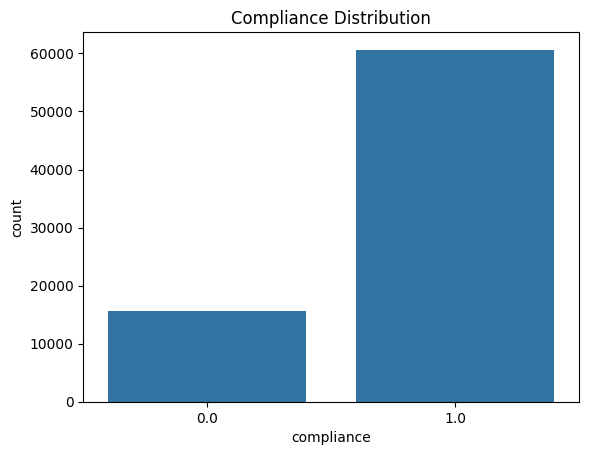

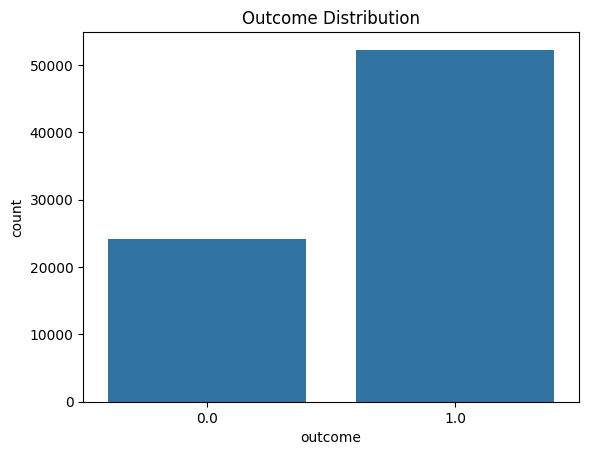

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compliance distribution
sns.countplot(data=df, x='compliance')
plt.title('Compliance Distribution')
plt.show()

# Outcome distribution
sns.countplot(data=df, x='outcome')
plt.title('Outcome Distribution')
plt.show()


Combine Labels with Features

In [ ]:
trace_features = df.groupby('cPOID').agg({
    'activity': list,
    'timestamp': list,
    'cItem': 'sum',
    'event_position': 'max'  # Length of trace
}).reset_index()

# Add compliance and outcome labels
trace_features = trace_features.merge(df[['cPOID', 'compliance', 'outcome']].drop_duplicates(), on='cPOID')
trace_features

,cPOID,activity,timestamp,cItem,event_position,compliance,outcome
0,2.000000e+09,"[SRM: Created, SRM: Change was Transmitted, SR...","[2018-01-02 12:53:00, 2018-01-02 13:53:00, 201...",12.0,12,1.0,1.0
1,2.000000e+09,"[SRM: Created, SRM: Change was Transmitted, SR...","[2018-01-02 12:53:00, 2018-01-02 13:53:00, 201...",12.0,12,1.0,0.0
2,2.000000e+09,"[SRM: Created, SRM: Change was Transmitted, SR...","[2018-01-02 12:53:00, 2018-01-02 13:53:00, 201...",12.0,12,0.0,0.0
3,2.000000e+09,"[SRM: Created, SRM: Change was Transmitted, SR...","[2018-01-02 12:53:00, 2018-01-02 13:53:00, 201...",12.0,12,NaN,NaN
4,2.000000e+09,"[SRM: Created, SRM: Document Completed, SRM: A...","[2018-01-03 08:49:00, 2018-01-03 09:49:00, 201...",15.0,15,1.0,1.0
...,...,...,...,...,...,...,...
88862,4.508076e+09,"[Vendor creates invoice, Create Purchase Order...","[2018-12-05 22:59:00, 2019-01-11 13:30:00, 201...",50.0,5,NaN,NaN
88863,4.508076e+09,"[Vendor creates invoice, Create Purchase Order...","[2019-01-06 22:59:00, 2019-01-11 13:43:00, 201...",2090.0,29,NaN,NaN
88864,4.508076e+09,"[Vendor creates invoice, Create Purchase Order...","[2019-01-10 22:59:00, 2019-01-15 07:43:00, 201...",1580.0,26,NaN,NaN
88865,4.508076e+09,"[Vendor creates invoice, Create Purchase Order...","[2019-01-07 22:59:00, 2019-01-16 11:12:00, 201...",40.0,4,NaN,NaN


Add new Features

In [ ]:
from collections import Counter

def add_custom_features(row):
    activities = row['activity']
    timestamps = row['timestamp']

    # Frequency of key activities
    freq_record_invoice_receipt = activities.count('Record Invoice Receipt')
    freq_set_payment_block = activities.count('Set Payment Block')

    # Durations between specific pairs of activities
    duration_goods_to_invoice = None
    duration_invoice_to_block = None
    if 'Record Goods Receipt' in activities and 'Record Invoice Receipt' in activities:
        idx_goods = activities.index('Record Goods Receipt')
        idx_invoice = activities.index('Record Invoice Receipt')
        duration_goods_to_invoice = (timestamps[idx_invoice] - timestamps[idx_goods]).total_seconds()

    if 'Record Invoice Receipt' in activities and 'Set Payment Block' in activities:
        idx_invoice = activities.index('Record Invoice Receipt')
        idx_block = activities.index('Set Payment Block')
        duration_invoice_to_block = (timestamps[idx_block] - timestamps[idx_invoice]).total_seconds()

    return pd.Series({
        'freq_record_invoice_receipt': freq_record_invoice_receipt,
        'freq_set_payment_block': freq_set_payment_block,
        'duration_goods_to_invoice': duration_goods_to_invoice,
        'duration_invoice_to_block': duration_invoice_to_block,
    })

custom_features = trace_features.apply(add_custom_features, axis=1)

trace_features = pd.concat([trace_features, custom_features], axis=1)

def calculate_transition_probabilities(activities):
    transitions = [(activities[i], activities[i + 1]) for i in range(len(activities) - 1)]
    transition_counts = Counter(transitions)
    total_transitions = sum(transition_counts.values())
    transition_probs = {key: val / total_transitions for key, val in transition_counts.items()}
    return transition_probs

trace_features['transition_probs'] = trace_features['activity'].apply(calculate_transition_probabilities)

trace_features = trace_features.drop(columns=['activity', 'timestamp'])

trace_features

,cPOID,cItem,event_position,compliance,outcome,freq_record_invoice_receipt,freq_set_payment_block,duration_goods_to_invoice,duration_invoice_to_block,transition_probs
0,2.000000e+09,12.0,12,1.0,1.0,1.0,0.0,4140.0,NaN,"{('SRM: Created', 'SRM: Change was Transmitted..."
1,2.000000e+09,12.0,12,1.0,0.0,1.0,0.0,4140.0,NaN,"{('SRM: Created', 'SRM: Change was Transmitted..."
2,2.000000e+09,12.0,12,0.0,0.0,1.0,0.0,4140.0,NaN,"{('SRM: Created', 'SRM: Change was Transmitted..."
3,2.000000e+09,12.0,12,NaN,NaN,1.0,0.0,4140.0,NaN,"{('SRM: Created', 'SRM: Change was Transmitted..."
4,2.000000e+09,15.0,15,1.0,1.0,1.0,0.0,9300.0,NaN,"{('SRM: Created', 'SRM: Document Completed'): ..."
...,...,...,...,...,...,...,...,...,...,...
88862,4.508076e+09,50.0,5,NaN,NaN,1.0,0.0,NaN,NaN,"{('Vendor creates invoice', 'Create Purchase O..."
88863,4.508076e+09,2090.0,29,NaN,NaN,1.0,0.0,NaN,NaN,"{('Vendor creates invoice', 'Create Purchase O..."
88864,4.508076e+09,1580.0,26,NaN,NaN,1.0,0.0,NaN,NaN,"{('Vendor creates invoice', 'Create Purchase O..."
88865,4.508076e+09,40.0,4,NaN,NaN,1.0,0.0,NaN,NaN,"{('Vendor creates invoice', 'Create Purchase O..."


In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
transition_features = vec.fit_transform(trace_features['transition_probs'].dropna())
transition_features_df = pd.DataFrame(transition_features, columns=vec.get_feature_names_out())
trace_features = pd.concat([trace_features.reset_index(drop=True), transition_features_df], axis=1)
trace_features = trace_features.drop(columns=['transition_probs'])
trace_features

,cPOID,cItem,event_position,compliance,outcome,freq_record_invoice_receipt,freq_set_payment_block,duration_goods_to_invoice,duration_invoice_to_block,"('Block Purchase Order Item', 'Block Purchase Order Item')",...,"('Vendor creates invoice', 'Record Subsequent Invoice')","('Vendor creates invoice', 'Release Purchase Order')","('Vendor creates invoice', 'Remove Payment Block')","('Vendor creates invoice', 'SRM: Created')","('Vendor creates invoice', 'SRM: In Transfer to Execution Syst.')","('Vendor creates invoice', 'SRM: Ordered')","('Vendor creates invoice', 'Set Payment Block')","('Vendor creates invoice', 'Update Order Confirmation')","('Vendor creates invoice', 'Vendor creates debit memo')","('Vendor creates invoice', 'Vendor creates invoice')"
0,2.000000e+09,12.0,12,1.0,1.0,1.0,0.0,4140.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.000000e+09,12.0,12,1.0,0.0,1.0,0.0,4140.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.000000e+09,12.0,12,0.0,0.0,1.0,0.0,4140.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.000000e+09,12.0,12,NaN,NaN,1.0,0.0,4140.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.000000e+09,15.0,15,1.0,1.0,1.0,0.0,9300.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88862,4.508076e+09,50.0,5,NaN,NaN,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88863,4.508076e+09,2090.0,29,NaN,NaN,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88864,4.508076e+09,1580.0,26,NaN,NaN,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88865,4.508076e+09,40.0,4,NaN,NaN,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split data into train, evaluation and test sets

In [ ]:
from sklearn.model_selection import train_test_split

targets = ['compliance', 'outcome']

# Drop rows with NaN in labels
trace_features = trace_features.dropna(subset=targets)

train_eval, test = train_test_split(
    trace_features,
    test_size=0.2,
    stratify=trace_features[targets],
    random_state=42
)

train, eval = train_test_split(
    train_eval,
    test_size=0.25,  # 25% of 80% = 20% of total data
    stratify=train_eval[targets],
    random_state=42
)

print(f"Train set size: {len(train)}")
print(f"Evaluation set size: {len(eval)}")
print(f"Test set size: {len(test)}")

# Optional: Inspect label distributions
print("Train label distribution:")
print(train[targets].value_counts(normalize=True))

print("Evaluation label distribution:")
print(eval[targets].value_counts(normalize=True))

print("Test label distribution:")
print(test[targets].value_counts(normalize=True))


Train set size: 7915
Evaluation set size: 2639
Test set size: 2639
Train label distribution:
compliance  outcome
1.0         1.0        0.462413
0.0         0.0        0.309033
1.0         0.0        0.218193
0.0         1.0        0.010360
Name: proportion, dtype: float64
Evaluation label distribution:
compliance  outcome
1.0         1.0        0.462296
0.0         0.0        0.308829
1.0         0.0        0.218264
0.0         1.0        0.010610
Name: proportion, dtype: float64
Test label distribution:
compliance  outcome
1.0         1.0        0.462296
0.0         0.0        0.308829
1.0         0.0        0.218264
0.0         1.0        0.010610
Name: proportion, dtype: float64


In [ ]:
# continue with training models














Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def create_preprocessor(df):
    # Identify categorical and numerical columns
    categorical_columns = ['cVendor']
    numerical_columns = ['cItem', 'year', 'month', 'day', 'hour']

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )
    return preprocessor
preprocessor = create_preprocessor(events_df_features)
X_transformed = preprocessor.fit_transform(events_df_features)


## Prepare data for model training

In [ ]:
from sklearn.model_selection import train_test_split

X = X_transformed  # Transformed features
y = events_df_features['cGR']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
print("y_train value counts:")
print(y_train.value_counts())

print("y_test value counts:")
print(y_test.value_counts())

y_train value counts:
cGR
1    944589
0      3504
Name: count, dtype: int64
y_test value counts:
cGR
1    629668
0      2394
Name: count, dtype: int64


Model Training - Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score

model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Use StratifiedKFold to maintain class proportions in each fold
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

roc_auc_scorer = make_scorer(roc_auc_score)

cv_scores = cross_val_score(model, X, y, cv=cv, scoring=roc_auc_scorer)

print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean():.4f}")


Cross-Validation ROC-AUC Scores: [1.         0.99762752 1.         0.99881235 1.         1.
 0.99881376]
Mean ROC-AUC Score: 0.9993


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict classes on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Calculate ROC-AUC score
test_roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test ROC-AUC Score: {test_roc_auc}")


Test Accuracy: 0.9999636111647275
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       1.00      1.00      1.00    632062
weighted avg       1.00      1.00      1.00    632062

Test ROC-AUC Score: 0.9999943214429178


Confusion Matrix - Logistic Regression

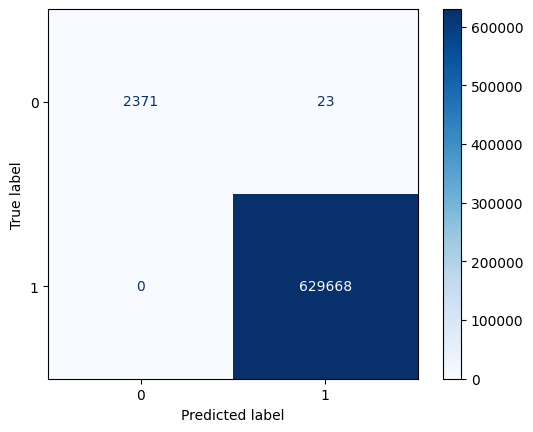

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()


Model Training - RF

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train the Random Forest
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=50,
    max_depth=10,        # Limit tree depth
    max_features='sqrt'
    )
model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Random Forest")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Random Forest
              precision    recall  f1-score   support

           0       0.02      0.84      0.05      2394
           1       1.00      0.87      0.93    629668

    accuracy                           0.87    632062
   macro avg       0.51      0.85      0.49    632062
weighted avg       1.00      0.87      0.93    632062

ROC-AUC Score: 0.9317019689956195


Confusion Matrix - Random Forest

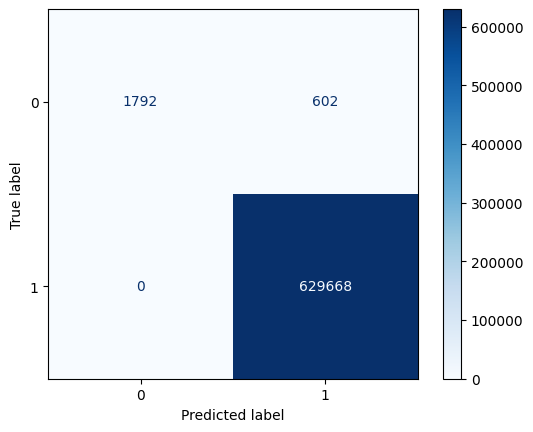

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()


Model Training - Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight


sample_weights = compute_sample_weight({0: 10, 1: 1}, y_train)


model = GradientBoostingClassifier(
    n_estimators=50,  # Reduce the number of trees
    max_depth=2,      # Shallow trees
    learning_rate=0.2, # Faster learning rate
    subsample=0.8,    # Use 80% of data for each tree
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting: {accuracy}")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC Score (for binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

Accuracy of Gradient Boosting: 0.9990475617898245
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       1.00      0.87      0.93    632062
weighted avg       1.00      1.00      1.00    632062

ROC-AUC Score: 0.9045981274804117


Confusion Matrix - Gradient Boosting

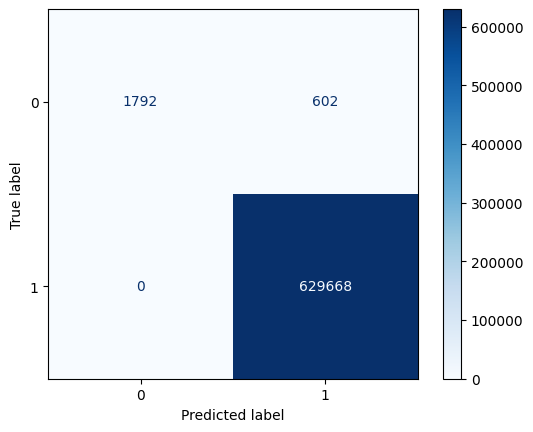

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()

Most Frequent Value

In [ ]:
# majority class
most_frequent_value = y_train.value_counts().idxmax()
print(f"Most Frequent Value (Majority Class): {most_frequent_value}")


Most Frequent Value (Majority Class): 1


In [ ]:
# Generate predictions based on the majority class
y_test_pred_baseline = [most_frequent_value] * len(y_test)

In [ ]:
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.9962123968851156


In [ ]:
from sklearn.metrics import classification_report

print("Baseline Classification Report:")
print(classification_report(y_test, y_test_pred_baseline))

Baseline Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       0.50      0.50      0.50    632062
weighted avg       0.99      1.00      0.99    632062



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


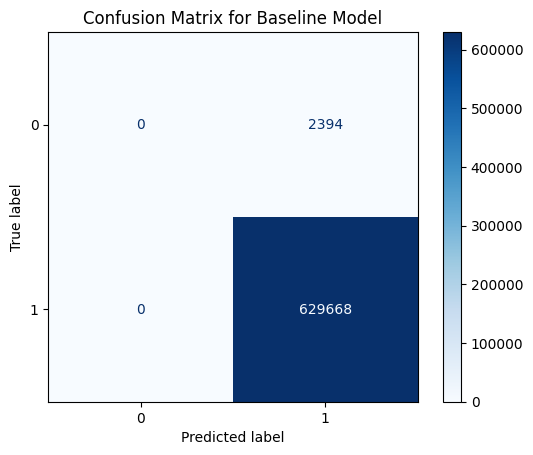

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Baseline Model")
plt.show()


Compare 4 above models (on zero class)

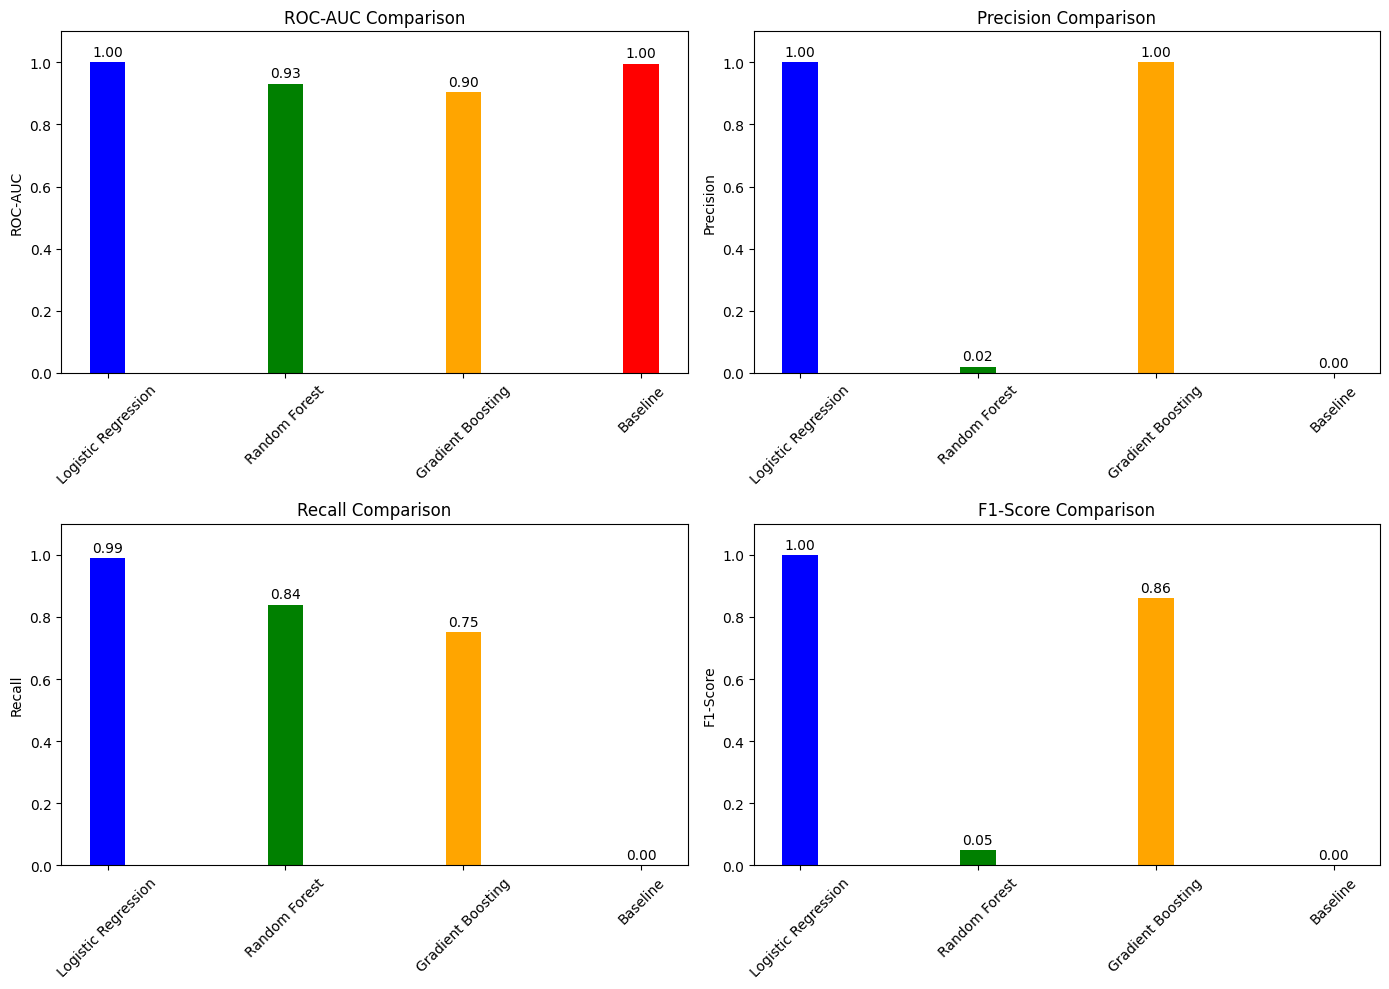

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metrics = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "Baseline"],
    "ROC-AUC": [0.9999943214429178, 0.9317019689956195, 0.9045981274804117, 0.9962123968851156],
    "Precision": [1.00, 0.02, 1.00, 0.00],
    "Recall": [0.99, 0.84, 0.75, 0.00],
    "F1-Score": [1.00, 0.05, 0.86, 0.00],
}

metrics_df = pd.DataFrame(metrics)

metrics_to_plot = ["ROC-AUC", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics["Model"]))
width = 0.2

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    ax.bar(x, metrics_df[metric], width, label=metric, color=['blue', 'green', 'orange', 'red'])
    ax.set_title(f"{metric} Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(metrics["Model"], rotation=45)
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.1)  # ROC-AUC and F1 are on a 0-1 scale
    for j, value in enumerate(metrics_df[metric]):
        ax.text(j, value + 0.02, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()


Accroding to the bars, random forest works best with this dataset.

## Deep Learning Approach

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

def ensure_numerical(df):
    # Convert target columns to integers
    df['cGR'] = df['cGR'].astype(int)
    df['cGRbasedInvVerif'] = df['cGRbasedInvVerif'].astype(int)

    # Log transformation for skewed numeric data
    df['cItem_log'] = np.log1p(df['cItem'])

    return df

events_df_features = ensure_numerical(events_df_features)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X_transformed  # Transformed features
y = events_df_features['cGR']  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Define and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1180
           1       1.00      1.00      1.00    314851

    accuracy                           1.00    316031
   macro avg       1.00      1.00      1.00    316031
weighted avg       1.00      1.00      1.00    316031



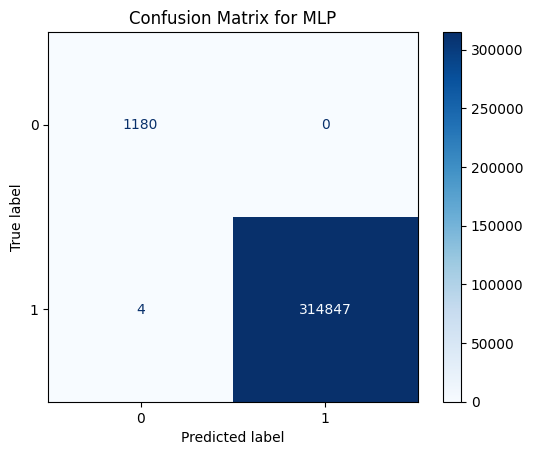

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_mlp = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for MLP")
plt.show()